Problem

Logistic Regression _ 
Banking_deposit_predictor

with a given dataset of bank client information. 
Predict whether the client has subscribed to a term deposit or not?

Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None

   Output variable -> y
   
   y -> Whether the client has subscribed a term deposit or not
   
   Binomial ("yes" or "no")


Importing the basic libraries and data 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("bank-full.csv",sep=";")

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


EDA

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# no null values are availble
# different types of datatype is availble 
# we will split the data based on datatypes

In [9]:
Numerical_features=[features for features in df.columns if df[features].dtypes!='0']
Discreate_features=[features for features in Numerical_features if len(df[features].unique())<25 and features not in Numerical_features]
Continous_features=[features for features in Numerical_features if features not in Discreate_features]
Categorical_features=[features for features in df.columns if df[features].dtypes=="0"]

In [10]:
Numerical_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [11]:
Continous_features


['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [13]:
df_numeric=df[Numerical_features]
df_numeric.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
df_categorical=df[Categorical_features]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Visualizations

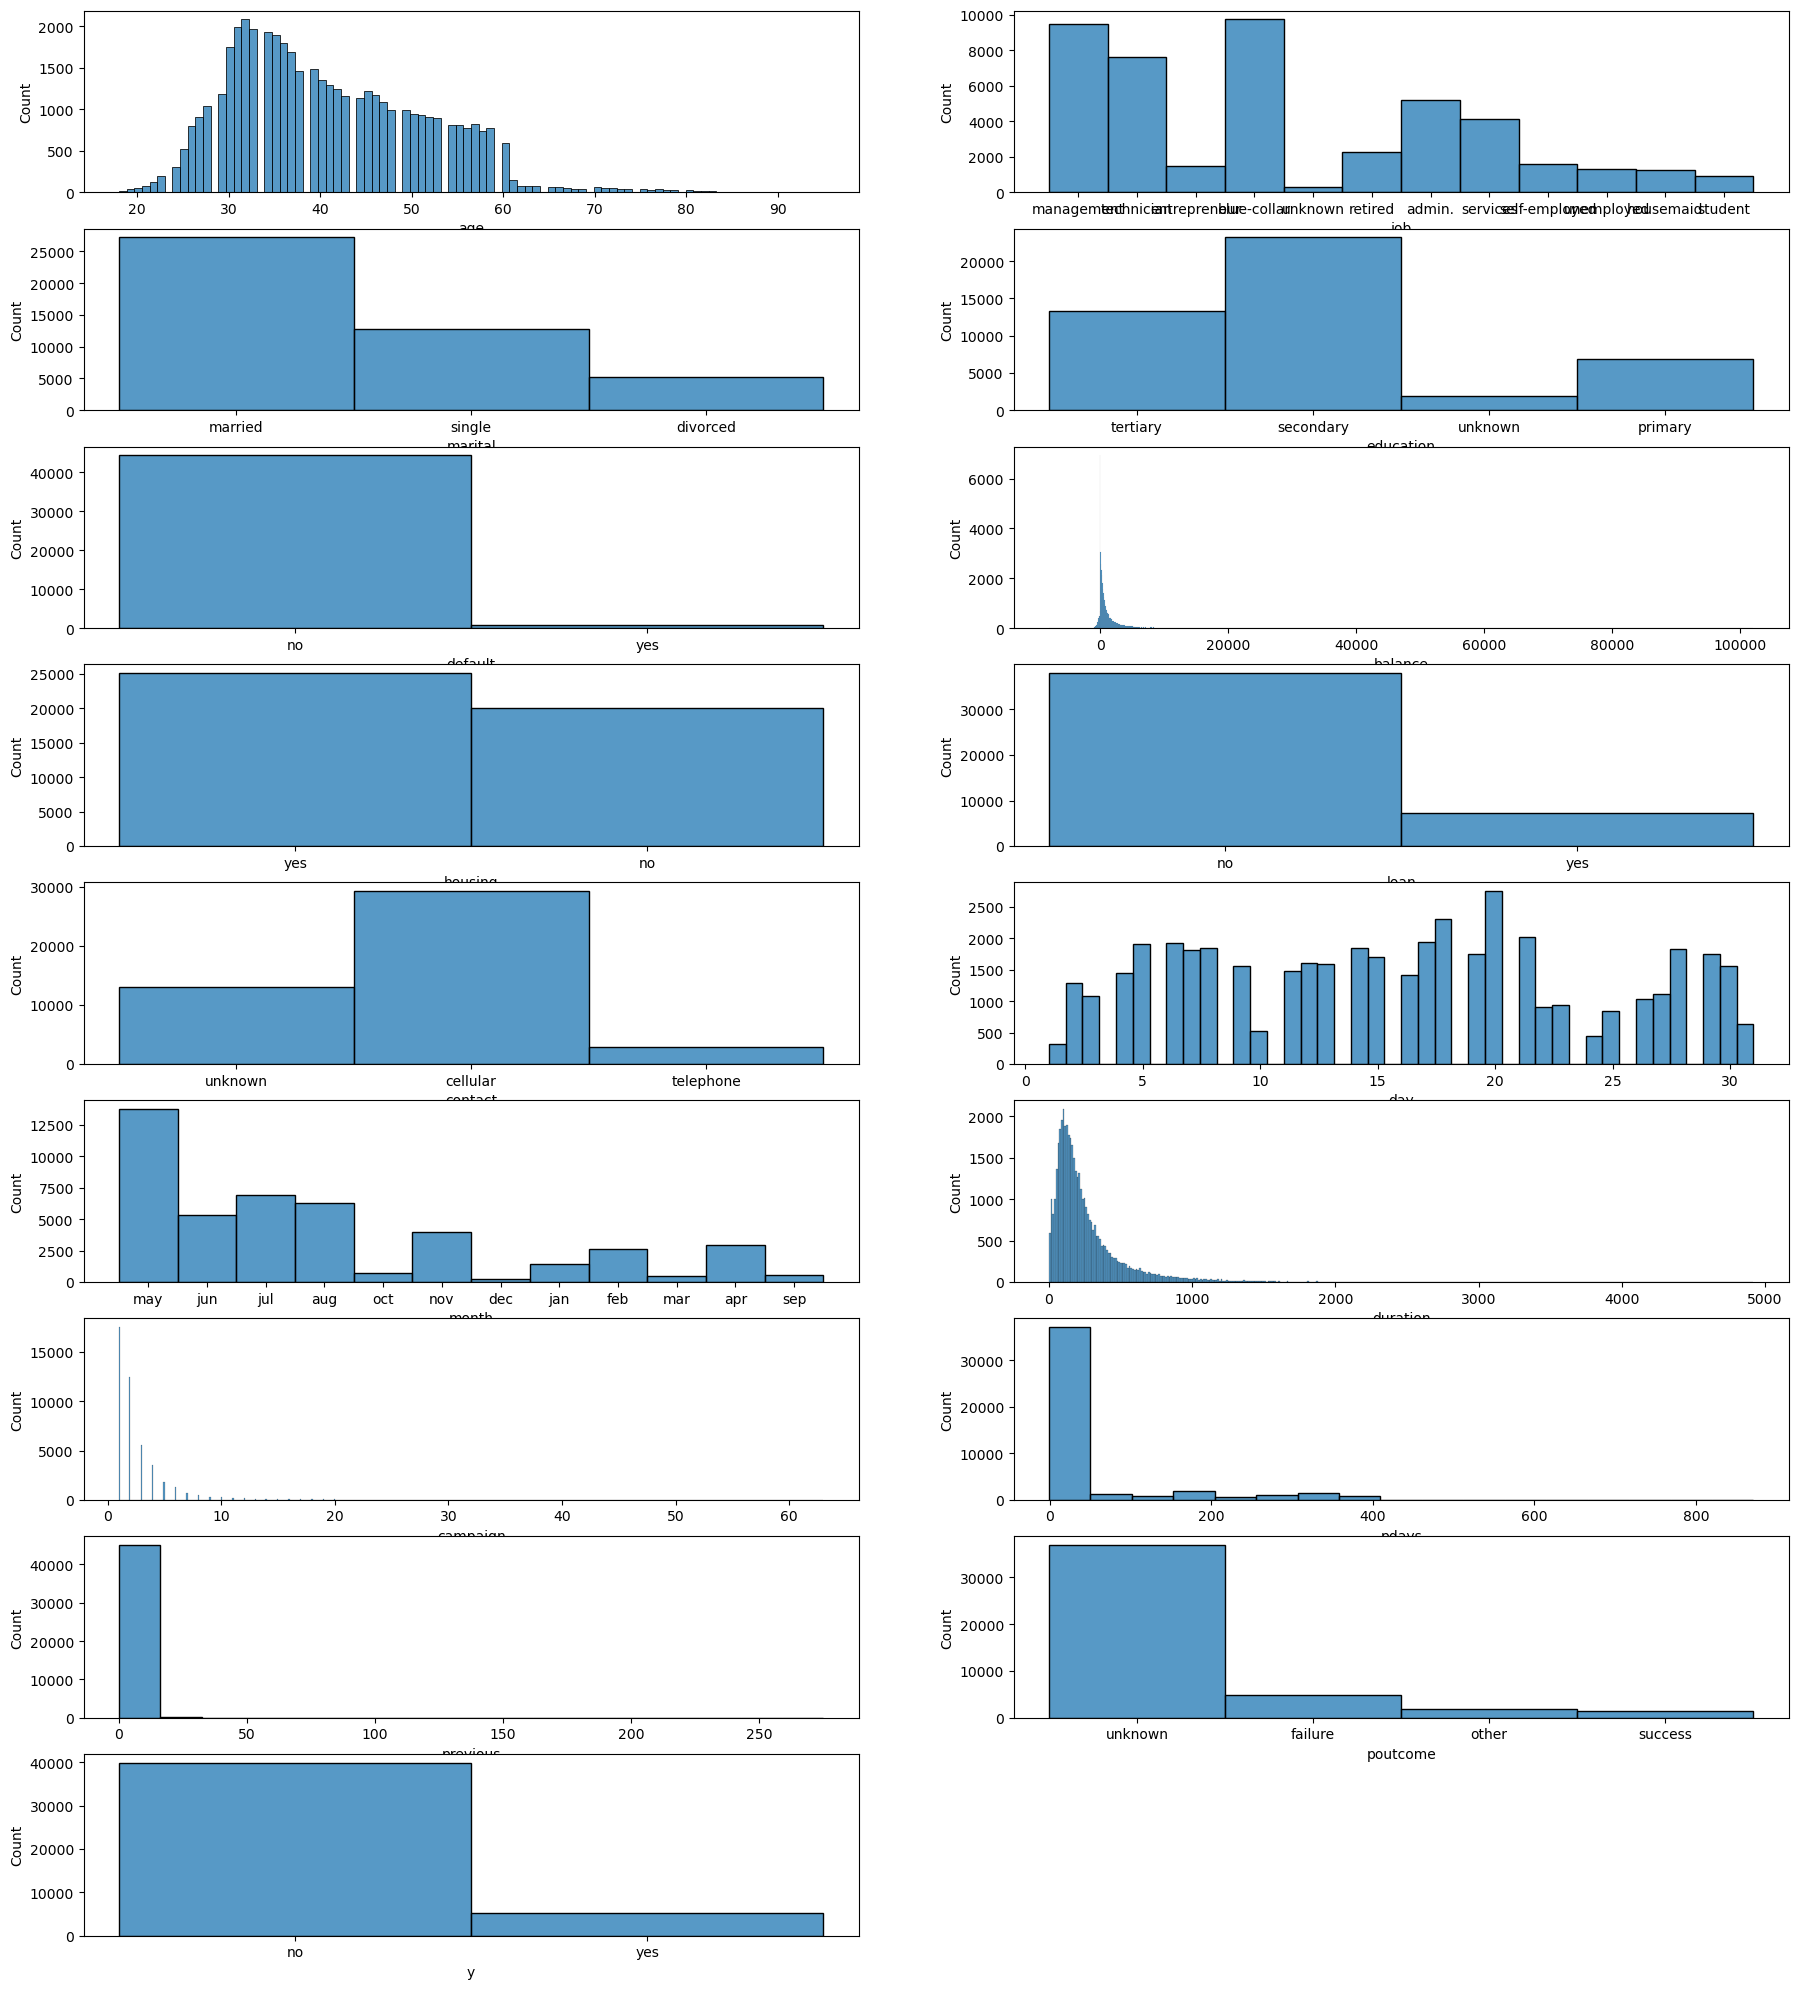

In [16]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(22,25))
for i, column in enumerate(df.columns, 1):
    plt.subplot(9,2,i)
    
    sns.histplot(df[column])

Train & Test

In [18]:

#labeling features
df1=df.copy()
for i, column in enumerate(df1.columns, 1):
  if df[column].dtype!='object':
    continue
  label_encoder=preprocessing.LabelEncoder()
  df1[column]=label_encoder.fit_transform(df1[column])
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


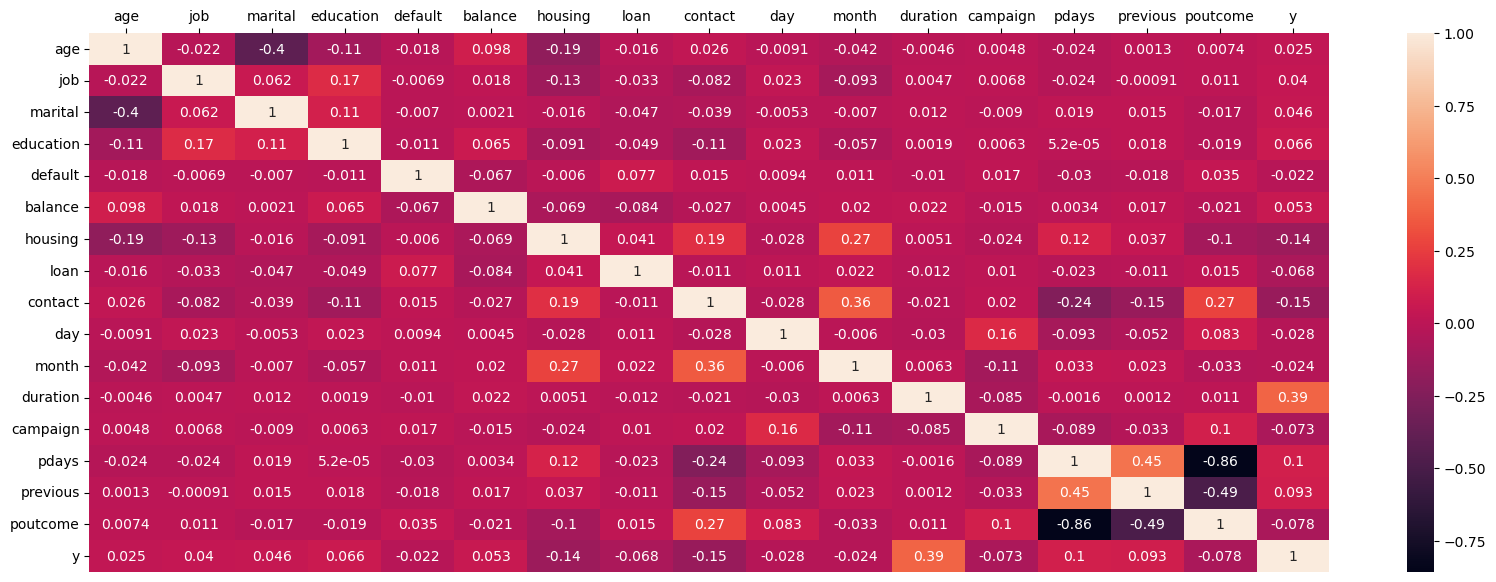

In [19]:
#plotting the heatmap for correlation
plt.figure(figsize=(20,7))
ax = sns.heatmap(df1.corr(), annot=True)
ax.xaxis.tick_top()

In [20]:
X=df1.iloc[:,0:16]
Y=df1.iloc[:,16]

In [21]:
#Split X & Y into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=1)

In [22]:
# logistic regression and fitting
classifier1 = LogisticRegression()
classifier1.fit(X_train,Y_train)
import warnings
warnings.filterwarnings('ignore')

In [23]:
# y prediction on x
y_pred1=classifier1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [24]:

y_pred_df2=pd.DataFrame({'actual':Y_test, 'predicted_prob':y_pred1})
y_pred_df2

,actual,predicted_prob
3610,0,0
11677,0,0
33018,0,0
44323,1,0
8119,0,0
...,...,...
22959,0,0
26059,0,0
18593,0,0
6959,0,0


In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.55      0.18      0.27      1050

    accuracy                           0.89      9043
   macro avg       0.72      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [26]:
# ROC Curve
classifier1.predict_proba(X)

array([[0.9438325 , 0.0561675 ],
       [0.95021294, 0.04978706],
       [0.95358471, 0.04641529],
       ...,
       [0.59577614, 0.40422386],
       [0.94244187, 0.05755813],
       [0.54245542, 0.45754458]])

In [27]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", np.round(accuracy_score(Y_test, y_pred1)*100),'%')

Accuracy :  89.0 %



Model validation with KFold method

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [29]:
# dv and iv
x=df1.iloc[:,0:16]
y=df1.iloc[:,16]
kfold = KFold(n_splits=3)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv=kfold)

In [30]:
results.mean()*100

88.4296412449626


With the K-fold validation test, we are getting 88% accuracy when we take 3 folds.

original model

In [31]:
# logistic regression and fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [32]:

# y prediction on x
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
y_pred_df=pd.DataFrame({'actual':Y, 'predicted_prob':y_pred})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [34]:
# ROC Curve
classifier.predict_proba(X)

array([[0.94851144, 0.05148856],
       [0.94884039, 0.05115961],
       [0.9469336 , 0.0530664 ],
       ...,
       [0.67163257, 0.32836743],
       [0.94032435, 0.05967565],
       [0.58150729, 0.41849271]])

In [35]:
classifier.predict_proba(X).shape

(45211, 2)

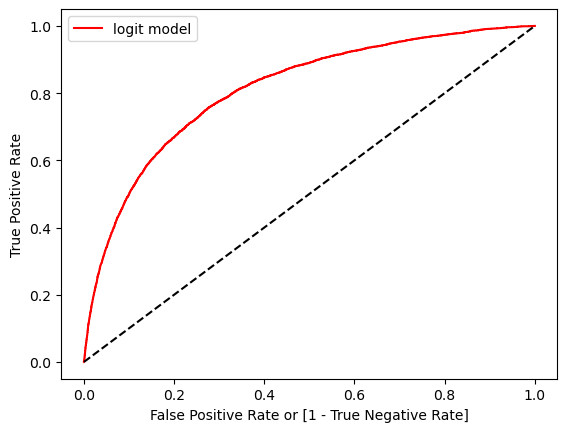

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thersholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
auc=roc_auc_score(Y,y_pred)


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [37]:
auc

0.5724913226281891

Conclusion:

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [39]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", np.round(accuracy_score(Y, y_pred)*100),'%')


Accuracy :  89.0 %



We are getting almost 89% accuracy.